In [15]:
#Random Forest without random forest classifier
# Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

heart_disease_df  = pd.read_csv("https://raw.githubusercontent.com/stay-fcsd/data-sc-final/main/heart.csv")

display('This is the current data frame for Heart Disease: ', heart_disease_df)

# one hot encoding. changing the data with string values to 1s and 0s

features_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina','Oldpeak', 'Male', 'Female', 'ATA', 'TA', 'ASY', 'NAP', 'Normal', 'ST', 'LVH', 'Up', 'Flat', 'Down']

heart_disease_df_he = heart_disease_df

#gender_column will now contain the date from 'Gender'
gender_column = heart_disease_df[["Sex"]]
#adding 'Male' feature and 'Female feature into the datafram'
heart_disease_df_he['Male'] = gender_column
heart_disease_df_he['Female'] = gender_column
#this removes the 'Gender' feature
heart_disease_df_he = heart_disease_df_he.drop('Sex', 1)

#chest_pain_type_column will now contain data from 'ChestPainType'
chest_pain_type_column = heart_disease_df[["ChestPainType"]]
heart_disease_df_he['ATA'] = chest_pain_type_column
heart_disease_df_he['TA'] = chest_pain_type_column
heart_disease_df_he['ASY'] = chest_pain_type_column
heart_disease_df_he['NAP'] = chest_pain_type_column
heart_disease_df_he = heart_disease_df_he.drop('ChestPainType', 1)

#resting_ECG_column will now contain data from 'ChestPainType'
resting_ECG_column = heart_disease_df[["RestingECG"]]
heart_disease_df_he['Normal'] = resting_ECG_column
heart_disease_df_he['ST'] = resting_ECG_column
heart_disease_df_he['LVH'] = resting_ECG_column
heart_disease_df_he = heart_disease_df_he.drop('RestingECG', 1)

#gender_column will now contain the date from 'Gender'
ST_slope_column = heart_disease_df[["ST_Slope"]]
#adding 'Male' feature and 'Female feature into the datafram'
heart_disease_df_he['Up'] = ST_slope_column
heart_disease_df_he['Flat'] = ST_slope_column
heart_disease_df_he['Down'] = ST_slope_column
#this removes the 'Gender' feature
heart_disease_df_he = heart_disease_df_he.drop('ST_Slope', 1)


#for the Gender features we broken into two columns
heart_disease_df_he['Male'] = heart_disease_df_he['Male'].replace(['M'], '1')
heart_disease_df_he['Male'] = heart_disease_df_he['Male'].replace(['F'], '0')

heart_disease_df_he['Female'] = heart_disease_df_he['Female'].replace(['M'], '0')
heart_disease_df_he['Female'] = heart_disease_df_he['Female'].replace(['F'], '1')

#for the ChestPainType we broken into four columns
heart_disease_df_he['ATA'] = heart_disease_df_he['ATA'].replace(['ATA'], '1')
heart_disease_df_he['ATA'] = heart_disease_df_he['ATA'].replace(['TA'], '0')
heart_disease_df_he['ATA'] = heart_disease_df_he['ATA'].replace(['ASY'], '0')
heart_disease_df_he['ATA'] = heart_disease_df_he['ATA'].replace(['NAP'], '0')

heart_disease_df_he['TA'] = heart_disease_df_he['TA'].replace(['ATA'], '0')
heart_disease_df_he['TA'] = heart_disease_df_he['TA'].replace(['TA'], '1')
heart_disease_df_he['TA'] = heart_disease_df_he['TA'].replace(['ASY'], '0')
heart_disease_df_he['TA'] = heart_disease_df_he['TA'].replace(['NAP'], '0')

heart_disease_df_he['ASY'] = heart_disease_df_he['ASY'].replace(['ATA'], '0')
heart_disease_df_he['ASY'] = heart_disease_df_he['ASY'].replace(['TA'], '0')
heart_disease_df_he['ASY'] = heart_disease_df_he['ASY'].replace(['ASY'], '1')
heart_disease_df_he['ASY'] = heart_disease_df_he['ASY'].replace(['NAP'], '0')

heart_disease_df_he['NAP'] = heart_disease_df_he['NAP'].replace(['ATA'], '0')
heart_disease_df_he['NAP'] = heart_disease_df_he['NAP'].replace(['TA'], '0')
heart_disease_df_he['NAP'] = heart_disease_df_he['NAP'].replace(['ASY'], '0')
heart_disease_df_he['NAP'] = heart_disease_df_he['NAP'].replace(['NAP'], '1')

#for the thal column we broken into three columns
heart_disease_df_he['Normal'] = heart_disease_df_he['Normal'].replace(['Normal'], '1')
heart_disease_df_he['Normal'] = heart_disease_df_he['Normal'].replace(['ST'], '0')
heart_disease_df_he['Normal'] = heart_disease_df_he['Normal'].replace(['LVH'], '0')

heart_disease_df_he['ST'] = heart_disease_df_he['ST'].replace(['Normal'], '0')
heart_disease_df_he['ST'] = heart_disease_df_he['ST'].replace(['ST'], '1')
heart_disease_df_he['ST'] = heart_disease_df_he['ST'].replace(['LVH'], '0')

heart_disease_df_he['LVH'] = heart_disease_df_he['LVH'].replace(['Normal'], '0')
heart_disease_df_he['LVH'] = heart_disease_df_he['LVH'].replace(['ST'], '0')
heart_disease_df_he['LVH'] = heart_disease_df_he['LVH'].replace(['LVH'], '1')

#for the thal column we broken into three columns
heart_disease_df_he['Up'] = heart_disease_df_he['Up'].replace(['Up'], '1')
heart_disease_df_he['Up'] = heart_disease_df_he['Up'].replace(['Flat'], '0')
heart_disease_df_he['Up'] = heart_disease_df_he['Up'].replace(['Down'], '0')

heart_disease_df_he['Flat'] = heart_disease_df_he['Flat'].replace(['Up'], '0')
heart_disease_df_he['Flat'] = heart_disease_df_he['Flat'].replace(['Flat'], '1')
heart_disease_df_he['Flat'] = heart_disease_df_he['Flat'].replace(['Down'], '0')

heart_disease_df_he['Down'] = heart_disease_df_he['Down'].replace(['Up'], '0')
heart_disease_df_he['Down'] = heart_disease_df_he['Down'].replace(['Flat'], '0')
heart_disease_df_he['Down'] = heart_disease_df_he['Down'].replace(['Down'], '1')

#for ExerciseAngina
heart_disease_df_he['ExerciseAngina'] = heart_disease_df_he['ExerciseAngina'].replace(['Y'], '1')
heart_disease_df_he['ExerciseAngina'] = heart_disease_df_he['ExerciseAngina'].replace(['N'], '0')

#we are going to move AHD feature to last column because its also going to be our dependent value
heart_disease_column = heart_disease_df_he.pop('HeartDisease')
heart_disease_df_he.insert(19, 'HeartDisease', heart_disease_column);


features_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Male', 'Female', 'ATA', 'TA', 'ASY', 'NAP', 'Normal', 'ST','LVH','Up','Flat','Down']
X=heart_disease_df_he[features_cols]
y=heart_disease_df_he['HeartDisease']


display('This is our data frame for heart disease that we will be using after one hot encoding conversion', heart_disease_df_he)

#Using “Decision Tree Classifier” to predict Heart Disease based on the training/testing datasets that we built 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 3)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
my_decisiontree = DecisionTreeClassifier(random_state = 3)
my_decisiontree.fit(X_train, y_train)

y_predict_dt = my_decisiontree.predict(X_test)

#Then, calculate and report the accuracy of your classifier.
score_dt = accuracy_score(y_test, y_predict_dt)
print(score_dt)

 # Using Ensemble Learning method called “Bagging” based on Voting on 500 decision tree classifiers.
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

samples_df = pd.DataFrame()

for i in range(499):
    
    #boostrap_size convert into integer using .8 of x.size
    bootstrap_size = int(np.floor( 0.8 * X_train.size))

    #resample X_train and y_train
    X_train_i = resample(X_train, n_samples = bootstrap_size, random_state = i, replace = True)
    y_train_i= resample(y_train, n_samples = bootstrap_size, random_state = i, replace = True)
    
    #define and train a new base discion tree classifier
    Base_DecisionTree = DecisionTreeClassifier(random_state =3)
    Base_DecisionTree.fit(X_train_i,y_train_i) 
    y_predict_dt = Base_DecisionTree.predict(X_test)
    
    
    samples_df['Sample', i + 1] = y_predict_dt
    

#we will perform voting by finding the mode of each row of the samples_df
#note to self for future reference even though it says columns it actually gets the mode of each row or i can just use 1 instead of columns
y_predict_from_samples_voting = samples_df.mode(axis='columns', numeric_only=True)

samples_df['Voting Results'] = y_predict_from_samples_voting

#will display all 500 samples data and the mode of each row in a new column called 'Voting Results'
display('We want to perform a new Ensemble Learning method called “Bagging” based on Voting on 500 decision tree classifiers', samples_df)
score_samples_from_voting = accuracy_score(y_test, y_predict_from_samples_voting)

print('This is our final accuracy score using Ensemble Learning Method called Bagging based on Voting: ', score_samples_from_voting)



'This is the current data frame for Heart Disease: '

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


'This is our data frame for heart disease that we will be using after one hot encoding conversion'

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Male,Female,ATA,TA,ASY,NAP,Normal,ST,LVH,Up,Flat,Down,HeartDisease
0,40,140,289,0,172,0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,49,160,180,0,156,0,1.0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,37,130,283,0,98,0,0.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,48,138,214,0,108,1,1.5,0,1,0,0,1,0,1,0,0,0,1,0,1
4,54,150,195,0,122,0,0.0,1,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,0,0,1,0,0,1,0,0,0,1,0,1
914,68,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0,0,0,1,0,1
915,57,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0,0,0,1,0,1
916,57,130,236,0,174,0,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1


0.8136645962732919


'We want to perform a new Ensemble Learning method called “Bagging” based on Voting on 500 decision tree classifiers'

,"(Sample, 1)","(Sample, 2)","(Sample, 3)","(Sample, 4)","(Sample, 5)","(Sample, 6)","(Sample, 7)","(Sample, 8)","(Sample, 9)","(Sample, 10)",...,"(Sample, 491)","(Sample, 492)","(Sample, 493)","(Sample, 494)","(Sample, 495)","(Sample, 496)","(Sample, 497)","(Sample, 498)","(Sample, 499)",Voting Results
0,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,1,0,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This is our final accuracy score using Ensemble Learning Method called Bagging based on Voting:  0.8354037267080745


This is one of my twenty decision trees for random forest


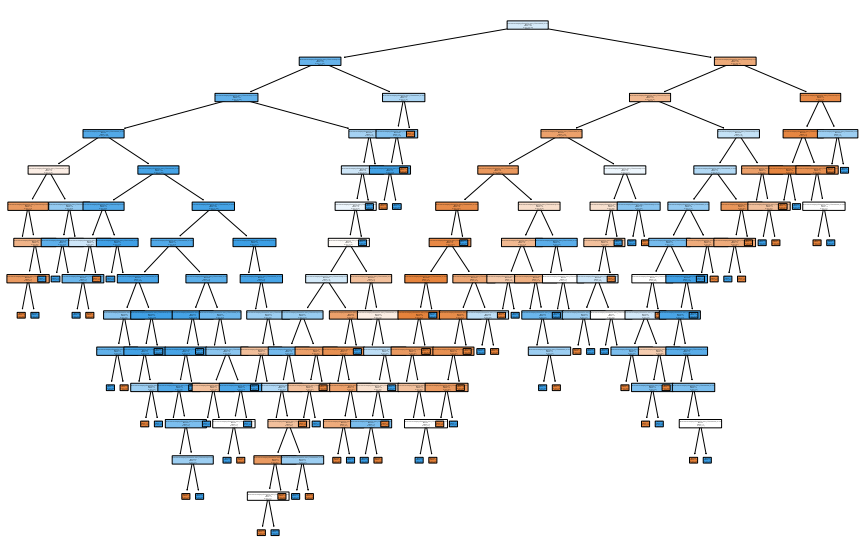

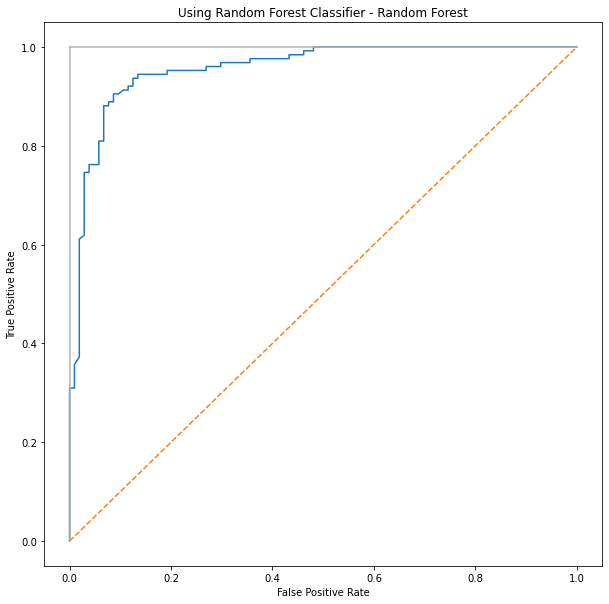

This is the accuracy score with random forest 0.9316770186335404
0.9561965811965811


In [24]:
#Random forest with random Forest Classifier

import matplotlib.pyplot as plt

from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Arrange Data into Features Matrix and Target Vector
X2 = heart_disease_df_he[features_cols]
y2 = heart_disease_df_he['HeartDisease']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=3)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=500,
                            random_state=3)
rf.fit(X_train2, y_train2)


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('This is one of my twenty decision trees for random forest')

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[1], 
          feature_names= rf, 
          class_names= ['0','1'], 
          filled=True, 
          impurity=True, 
          rounded=True)


fig.savefig('randomforest.pdf')

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_score2 = rf.predict_proba(X_test2)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test2, y_score2)

plt.subplots(1, figsize=(10,10))
plt.title('Using Random Forest Classifier - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_predict_RandomForest2 = rf.predict(X_test)
score_RandomForest2 = accuracy_score(y_test, y_predict_RandomForest2)
print("This is the accuracy score with random forest", score_RandomForest2)

from sklearn import metrics
# AUC:
AUC = metrics.auc(false_positive_rate2, true_positive_rate2)
print(AUC)
